<center><strong>Conteúdo</strong></center>

<ol type="1">
  <li>Prólogo: Visualização de Datasets Multidimensionais
    <ol type="I">
      <li>Introdução à Visualização de Dados</li>
      <li>Redução de Dimensionalidade</li>
      <li>Uniform Manifold Approximation and Projection - UMAP</li>  
    </ol>
  </li>
  <li>Refino de avaliação de crédito a ser oferecido
    <ol type="I">
      <li>Visão Geral do Dataset</li>
      <li>Comparação entre Plots de Inadimplentes e Adimplentes</li>
      <li>Insights Adquiridos</li>
      <li>Referências</li>  
    </ol>
  </li>  
</ol>

---

<center>
    
# 1. Visualização de Datasets Multidimensionais
    


## I\. Introdução à Visualização de Dados

</center>

No campo da `visualização de dados`, livros como *Sémiologie Graphique: Les diagrammes, les réseaux, les cartes* de Jacques Bertin e *The Visual Display of Quantitative Information* de Edward Tufte, marcam o início do seu desenvolvimento. Nestes livros a teoria e a prática para a visualização de dados foi formada e ambas se baseiam em conceitos como a efetiva comunicação através de apresentações visuais que usam a clareza, simplicidade e integridade do `design de gráficos`. Estes livros também introduziram uma forma sistemática de construir gráficos.  Hoje livros como *Storytelling with Data* de Cole Nussbaumer Knaflic tratam dos padrões utilizados hoje na indústria para apresentar dados.

Ao passo que avanços são feitos na criação e análise de gráficos, também cresce a complexidade e o tamanho dos dados a serem plotados. Observa-se inclusive um comportamento exponencial na taxa de geração anual de dados ao analisarmos o gráfico abaixo.

<center><img src="https://cdn.buttercms.com/output=f:webp/ods4p5fQVmXkFeHFP3Zx" width="500" height="500"><center>
    
<code><center>Fonte:<a href='https://explodingtopics.com/blog/data-generated-per-day'>https://explodingtopics.com/blog/data-generated-per-day</a><br>1 Zettabyte = 1.099511627776 x 10¹² Gygabyte.</center></code>

Consequentemente, formas mais avançadas de visualização de dados se fazem necessárias. Uma destas formas é a `redução dimensional`. Essa técnica consiste, de uma forma bem resumida, na redução de um dataset com várias `features` ou colunas a um arranjo de datapoints em um espaço, no caso do exemplo seguir, tri-dimensional. Neste espaço 3D, cada ponto está espaçado do outro conforme os padrões presentes no dataset pois os métodos de redução dimensional procuram conservar a `estrutura global`.
 
<center><img src="https://static.observableusercontent.com/files/0ff591ecaf96c676c84bf4a4bee11a01d61f90a46989435b32167e69ed414552489581e0db6e9fd1b695e29280e015c497b531d0cafba2c1811bf9ad42b26af5" width="500" height="500"></center>

<code><center>Fonte:<a href='https://static.observableusercontent.com/files/0ff591ecaf96c676c84bf4a4bee11a01d61f90a46989435b32167e69ed414552489581e0db6e9fd1b695e29280e015c497b531d0cafba2c1811bf9ad42b26af5'>https://observablehq.com/@stwind/exploring-fashion-mnist</a></center></code>

No exemplo acima, o dataset Fashion MNIST foi reduzido a 3 dimensões. Repare como os datapoints foram clusterizados conforme as features originais. A forma destes `clusters` traduz padrões em relação ao dataset extremamente difíceis de serem percebidos utilizando-se gráficos bidimensionais como gráficos de barra. Além disso, a velocidade com que se obtém uma visão geral dos dados é superior.

<center>

## II\. Redução de Dimensionalidade

Um dos exemplos de redução de dimensionalidade é a Principal Component Analysis. Esta busca representar um dataset multidimensional, com várias features, em um espaço dimensional menor preservando o máximo de variância possível. O algoritmo centraliza os dados, computa uma matriz de covariância, decompõe um eigenvalue, seleciona um componente principal e por fim faz a projeção do dataset em uma dimensão reduzida. [Aqui](https://medium.com/analytics-vidhya/understanding-principle-component-analysis-pca-step-by-step-e7a4bb4031d9) você encontra uma explicação matemática mais aprofundada. Um exemplo da aplicação da PCA utilizando a biblioteca Scikit-Learn segue. Primeiramente faremos os imports necessários.

In [1]:
#!pip install seaborn
#!pip install streamlit
#!pip install scikit-learn
#!pip install plotly
#!pip install pyviz
#!pip install holoviews
#!pip install datashader 
#!pip install bokeh
#pip install umap

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import plotly.offline
import plotly.express as px
import plotly.graph_objs as go
import umap
from umap import UMAP
import umap.plot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", message=".*cuDNN.*")
warnings.filterwarnings("ignore", message="Attempting to register cuBLAS")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="n_jobs value -1 overridden to 1 by setting random_state")

c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Além do Scikit-Learn, importamos também o Matplotlib e o Plotly para plotar gráficos, Seaborn que é construída sobre o Matplotlib para simplificar a criação de vizualizações mais complexas, Numpy para computações numéricas, UMAP para uma redução dimensional mais acurada.

Agora precisamos importar o dataset a ser reduzido, para isso utilizaremos um dataset bem simples, o qual traz dados sobre cereais matinais de 80 marcas diferentes e alguns de seus dados nutricionais. Este dataset pode ser encontrado [aqui](https://perso.telecom-paristech.fr/eagan/class/igr204/data/cereal.csv).

In [2]:
try:
    df = pd.read_csv('https://perso.telecom-paristech.fr/eagan/class/igr204/data/cereal.csv',na_values='na',delimiter=';')
except Exception as exc:
    print(str(exc))
    print(type(exc))
    
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843
6,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
7,Apple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.174094
8,Basic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
9,Bran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.120253


Utilizamos a função `read_csv` da biblioteca Pandas pois a mesma permite ler arquivos csv e transforma-los em um objeto `DataFrame` do Pandas diretamente a partir de uma `url`. Essa funcionalidade é muito útil para um analista ou cientista de dados. Afim de verificar se o dataset foi corretamente importado, utilizaremos um dos métodos do `DataFrame` df, o `head` que retorna a enésima linha passada como parâmetro. Neste caso 10.

Analisaremos agora o Schema do dataset, afim de verificar a correta associação entre `datatype` e `feature`, pois atributos numéricos devem ser tratados como `float` ou `int` enquanto que atributos categóricos devem ser tratados como `strings`. Tomando a tabela acima como exemplo, a feature `name` que representa um atributo categórico, deve possuir dados do tipo `string` enquanto que a feature `carbo` deve possuir dados do tipo `float`. Utilzaremos o método `dtypes` para isso.

In [3]:
df.dtypes

name        object
mfr         object
type        object
calories    object
protein     object
fat         object
sodium      object
fiber       object
carbo       object
sugars      object
potass      object
vitamins    object
shelf       object
weight      object
cups        object
rating      object
dtype: object

`df.dtypes` retorna cada `feature` e seu respectivo `data type`, e verifica-se atributos decimais ou inteiros sendo tratados como `object` que é a interpretação do Pandas para `strings`. Percebe-se também que a segunda linha do dataset corresponde à palavras identificando os `data types` de cada feature, isso acaba forçando erroneamente o Pandas a interpretar o restante de todos os dados de todas as features como `strings`. Afim de evitar isso, saltaremos especificamente a segunda linha ao construir o `DataFrame` df utilizando o argumento `skiprows` com o parâmetro `1` correspondente à segunda linha do `csv`.

In [4]:
try:
    df = pd.read_csv('https://perso.telecom-paristech.fr/eagan/class/igr204/data/cereal.csv',na_values='na',delimiter=';',skiprows=[1])
except Exception as exc:
    print(str(exc))
    print(type(exc))    

print(df.dtypes)
df.head(3)

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


Faremos agora uma análise separando somente os dados do tipo `object` utilizando o método `select_dtypes` que seleciona somente as features cujo `data type` é igual ao parâmetro desejado. O método `transpose` é utilizado apenas para transpor linhas e colunas e facilitar a vizualização dos dados.

In [5]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
name,77,77,100% Bran,1
mfr,77,7,K,23
type,77,2,C,74


Mesma análise, mas com os dados do tipo `int` ou `float`.

In [6]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


Note que o Pandas retorna características pertinentes a cada `data type` em questão. Por exemplo, desvio padrão para atributos numéricos e contagem de valores unicos para atributos categóricos.

Precisamos agora verificar se existem dados faltantes,para isso, utilizaremos o método `isna` que retorna uma matriz com o mesmo tamanho da analisada mas populada com valores `True` ou `False`, seguido do método `describe` que retorna caracteristicas dos dados presentes na matriz.

In [7]:
df.isna().describe()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77


Verifica-se que o número de ocorrências do valor `False` em cada `feature` corresponde ao valor de dados presentes no dataset original. Portanto não há ocorrências de dados faltantes.

Depois das etapas acima de importação e limpeza de dados e correção de schema estamos aptos a utilizar a PCA disponibilizada no Scikit-learn. Como a PCA é um apanhado de cálculos matemáticos, como cálculos matriciais, faz sentido utilizarmos somente as features com atributos numéricos. Criaremos uma variável que contenha somente estes data types.

In [8]:
df_num = df.select_dtypes('number').drop('rating', axis=1)
df_str = df.drop('rating', axis=1)
#df_num.head(3)

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Define etapas de preprocessamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])




Criaremos agora um objeto utilizando a função PCA do scikit-learn a qual cria um "molde" no qual os dados serão inseridos para serem reduzidos à uma dimensão menor. Esta função possui o parâmetro `n_components` o qual representa o número de dimensões ao qual o dataset original será reduzido, neste caso `2`.

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

pca1 = PCA(n_components=2)
umap1 = UMAP(n_components=2,n_neighbors=5,random_state=42,init="spectral",metric="manhattan",spread=1,min_dist=0.01) #random_state para evitar comportamento não determinístico do código.

# Criação de pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('umap', umap1),
    ('pca', pca1)
])

# Fita o dataset
embedded_data = pipeline.fit_transform(df)

Os próximos passos são encontrar as direções das máximas variâncias e utilizar as `2` maiores ou ainda as `principal components`. Neste momento o algoritmo realiza varias 

In [10]:
df_pca = pca1.fit_transform(df_scaled)


`df_pca` é do tipo `numpy.ndarray` e representa as coordenadas de cada `data point` do `dataset` original neste novo espaço dimensional com `2` dimensões. Isso nos leva a concluir também que `df_pca` pode ser utilizado como parâmetro de funções de bibliotecas de plotagem de gráficos como Matplotlib e Plotly como segue abaixo. UMAP foi inicializado para poder ser utilizado posteriormente.

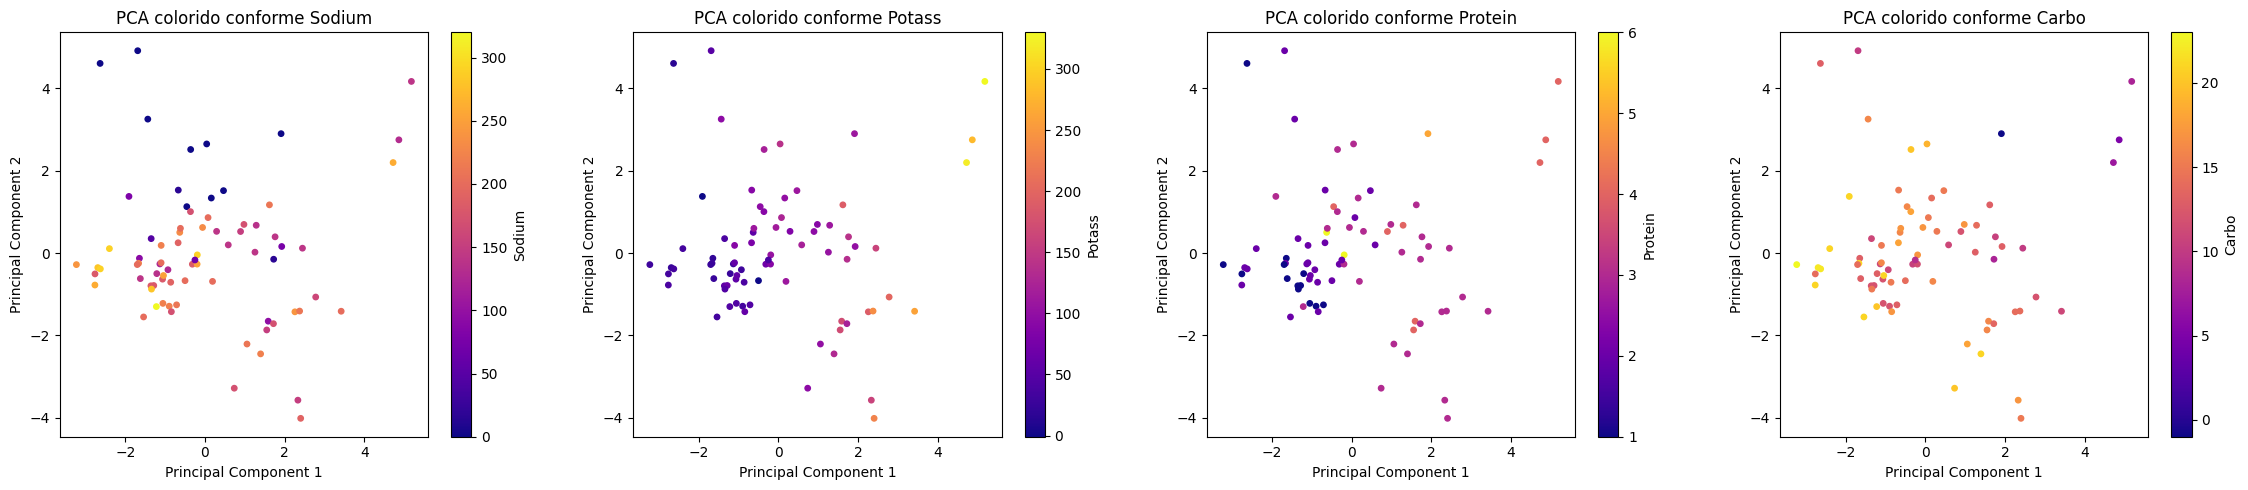

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(23, 5))

features = ['sodium', 'potass', 'protein', 'carbo']

for i, feature in enumerate(features):
    scatter = axs[i].scatter(df_pca[:, 0], 
                              df_pca[:, 1],
                              marker='o',
                              s=15,
                              c=df[feature], 
                              cmap='plasma'
                              )
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].set_title(f'PCA colorido conforme {feature.capitalize()}')
    fig.colorbar(scatter, ax=axs[i], label=features[i].capitalize())

plt.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()

Repare que a PCA consegue realizar alguma clusterização quando se plota as principal components. Entretanto, devido ao fato da não linearidade presente no dataset, a Principal Component Analysis não consegue uma formação de clusters bem definida. Ao analisarmos a clusterização resultante do UMAP percebemos uma formação de clusters bem mais definida, o que permite observar insights sobre o dataset em questão pois o UMAP lida melhor com não linearidade.

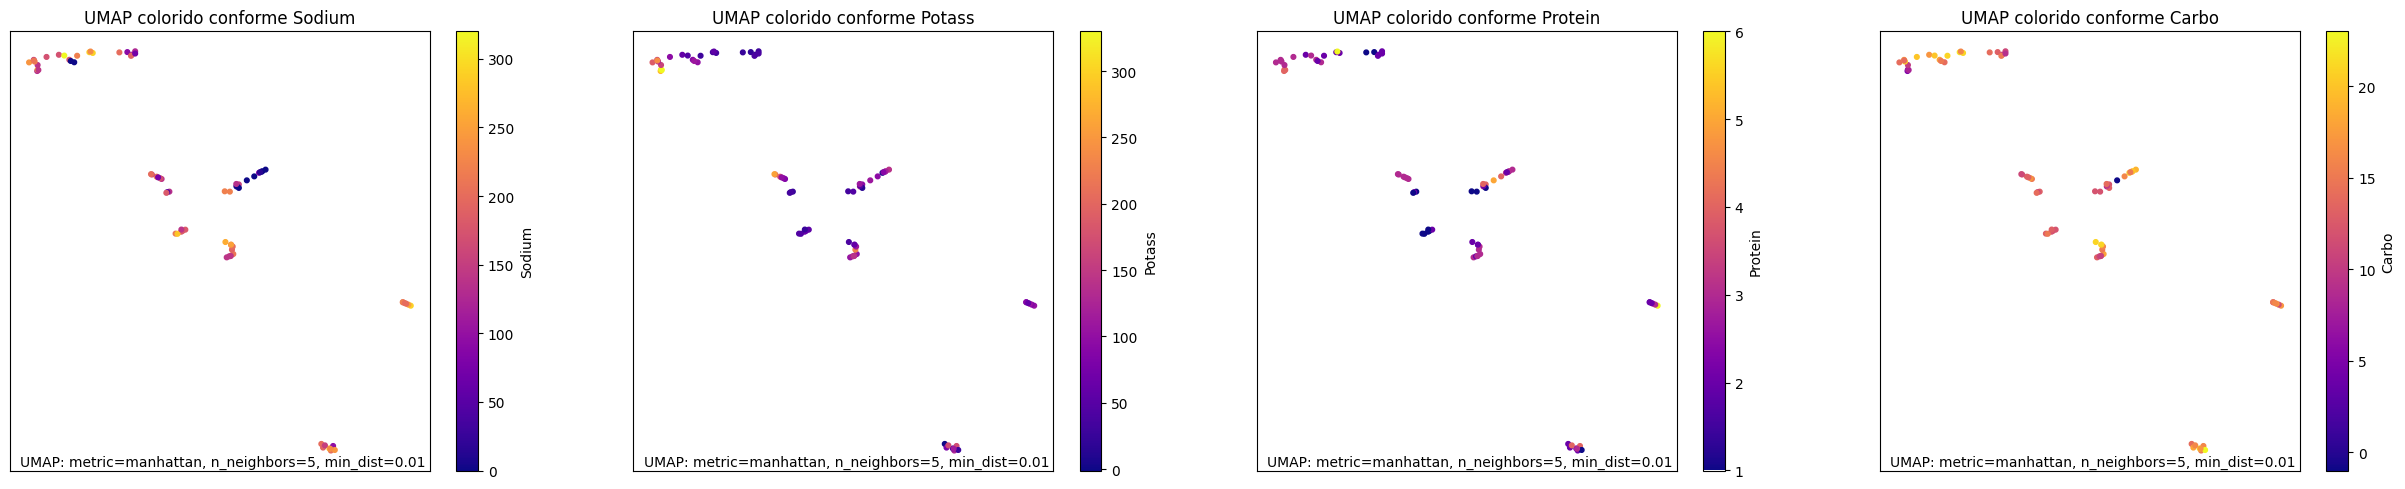

In [12]:
#principal_components = pca1.components_
#print(principal_components[0].max())
#print(principal_components[1].max())
#print(principal_components.transpose())
#print(type(principal_components))
#principal_components.shape

fig, axes = plt.subplots(1,4,figsize=(25,5))

features = ['sodium', 'potass', 'protein', 'carbo'] #calories	protein	fat	sodium	fiber	carbo	sugars	potass	vitamins	shelf	weight	cups	rating

for i, feature in enumerate(features):
    sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=df[feature].min(), vmax=df[feature].max()))
    umap.plot.points(umap1, values=df[feature], ax=axes[i],show_legend=True,cmap='plasma')
    cbar = plt.colorbar(sm, ax=axes[i])
    cbar.set_label(feature.capitalize())
    axes[i].set_title(f'UMAP colorido conforme {feature.capitalize()}')
    
    
plt.tight_layout()
plt.show()

<center>

## III\. UMAP

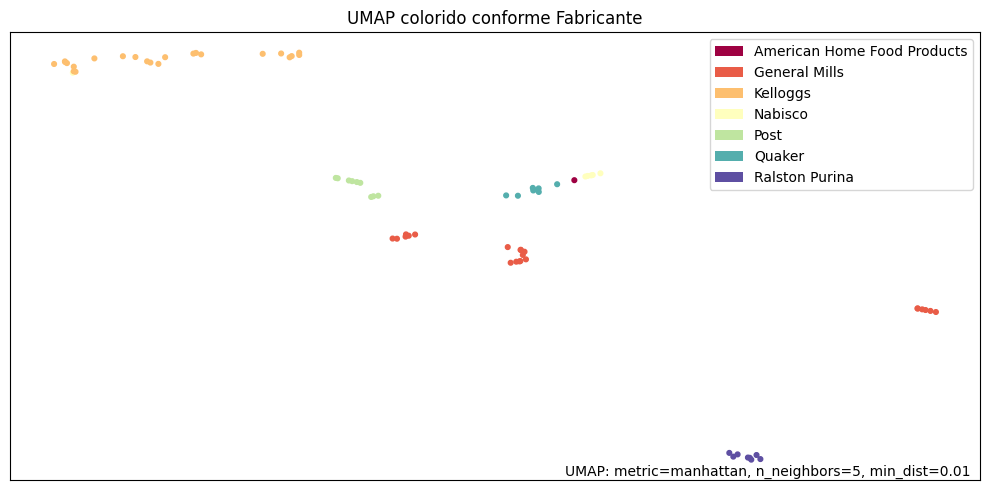

In [13]:
fig, axes = plt.subplots(1, figsize=(10,5))
umap.plot.points(umap1, labels=df_str.mfr, ax=axes)
axes.set_title('UMAP colorido conforme Fabricante')
legend_labels = ['American Home Food Products','General Mills','Kelloggs','Nabisco','Post','Quaker','Ralston Purina']
legend = axes.get_legend()
if legend:
    for text, new_label in zip(legend.get_texts(), legend_labels):
        text.set_text(new_label)
plt.tight_layout()
plt.show()

O Uniform Manifold Approximation and Projection permite uma clusterização mais definida. Isso permite analisar melhor a variável dependente (`default`), no caso do dataset deste projeto. Features como (`idade`, `salário`, etc.) podem ser utilizadas colorir os clusters e obter insights sobre esses grupos de clientes ao analisarmos como cada feature varia entre os clientes de cada grupo.

Esta técnica relativamente avançada para se reduzir a dimensionalidade de um dataset com várias dimensões, ao contrário de técnicas lineares como PCA que tentam manter a variância, se destaca pela capacidade de preservar estruturas mais complexas e não lineares presentes nestes tipos de datasets. A mesma é projetada para captar essas relações não-lineares, permite também uma preservação de estruturas locais e globais e lida de maneira eficiente com datasets grandes.

Os principais parâmentros para o uso mais básico do UMAP são: `n_neighbors`, `n_components`, `metric` e `min_dist`. Os mesmos regem como será o tamanho dos clusters, a distância entre eles, a distância entre cada cliente e a forma dos clusters.

O UMAP possui uma característica estocástica que afetam como ele processa e representa os dados a cada vez quie o algoritmo é executado. Desta forma duas execuções seguidas do mesmo data set utilizando os mesmos parâmetros podem geras diferentes clusterizações. Isso acontece pois o algoritmo utiliza técnicas estocásticas, que envolvem processos aleatórios, para otimizar a projeção dos datapoints. Afim de utilizar a mesma clusterização ao comparar várias features utilizaremos o parâmetro `random_state` com um valor fixo. O parâmetro `init` com o valor spectral ajuda a capturar melhor as relações entre os datapoints neste dataset complexo e não linear.



 

<center>
    
# 2. Refino de Avaliação de Crédito
    


## I\. Visão Geral do Dataset

</center>

Vamos começar lendos os dados num dataframe `pandas`.

In [14]:
try:
    df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv',na_values='na')
except Exception as exc:
    print(str(exc))
    print(type(exc))
    
df.head(n=10)

#### **2.1. Estrutura**
df.shape # retorna uma tupla (qtd linhas, qtd colunas)
df[df['default'] == 0].shape
df[df['default'] == 1].shape
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

#### **2.2. Schema**
print(df.escolaridade)
df.dtypes# - Colunas e seus respectivos tipos de dados.
df.select_dtypes('object').describe().transpose()# - Atributos **categóricos**.
df.drop('id', axis=1).select_dtypes('number').describe().transpose()# - Atributos **numéricos**.

### **2.3. Dados faltantes**
print(df.escolaridade.value_counts())#Podemos verificar quais colunas possuem dados faltantes.
df.dropna(inplace=True)
print(df.escolaridade.value_counts().to_frame())


# - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)
stats_dados_faltantes(df=df)
stats_dados_faltantes(df=df[df['default'] == 0])

## 3\. Transformação e limpeza de dados
#Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))
print(valores_originais)
print(valores_limpos)
#Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%
0               ensino medio
1                   mestrado
2                   mestrado
3               ensino medio
4        sem educacao formal
                ...         
10122               mestrado
10123                    NaN
10124           ensino medio
10125               mestrado
10126               mestrado
Name: escolaridade, Length: 10127, dtype: object
escolaridade
mestrado               3128
ensino medio           2013
sem educacao formal    1487
graduacao              1013
doutorado               967
Name: count, dtype: int64
                     count
escolaridade              
mestrado              2591
ensino medio          1653
sem educacao formal   1204
graduacao              844
doutorado              789
['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com o data set livre de dados faltantes faremos a separação entre os data points que são inteiros ou decimais e os que são strings. Após isso, aplicaremos o UMAP nos numeric_features para posteriormente compararmos a variação de certas features nos clusters formados.

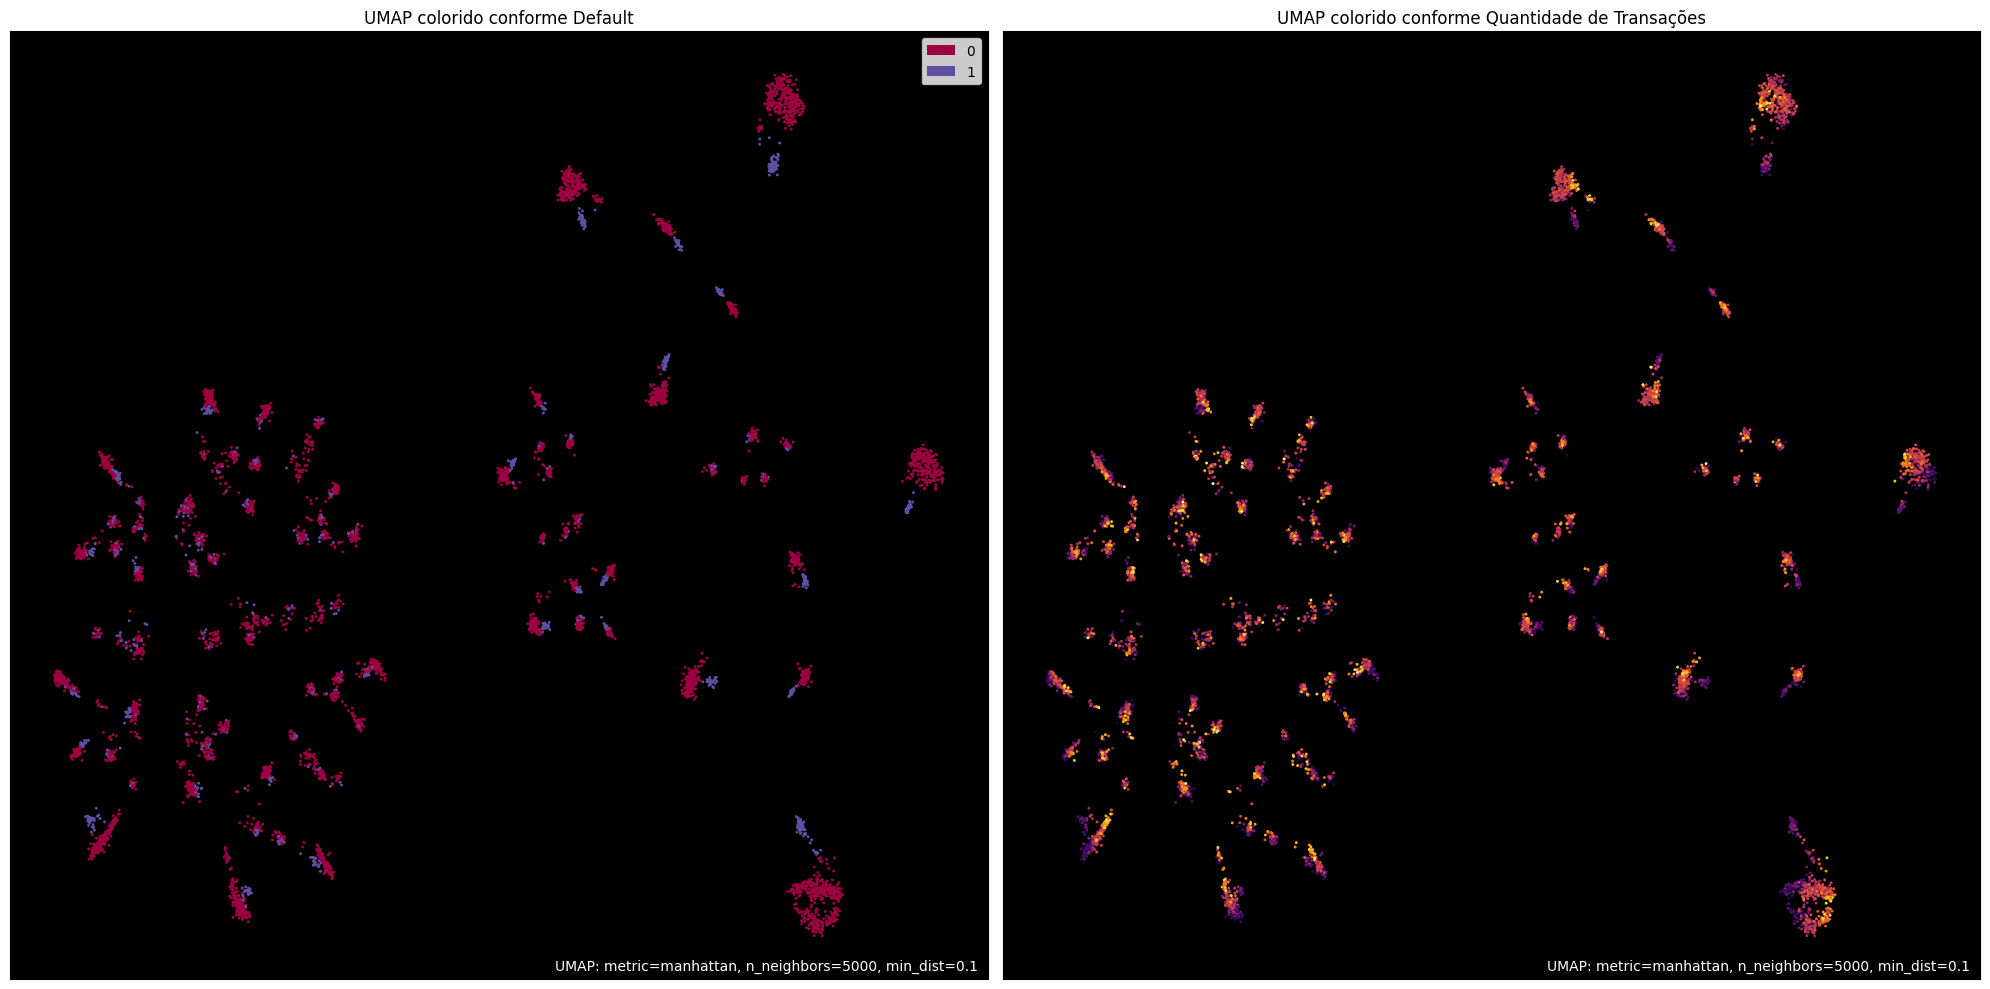

In [15]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Define etapas de preprocessamento
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

umap2 = UMAP(
    n_components=2,
    n_neighbors=5000,
    random_state=42,
    init="spectral",
    metric="manhattan",
    spread=1,
    min_dist=0.1
) 

# Criação de um pipeline
pipeline2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('umap', umap2)
    
])

# Fita o dataset
embedded_data = pipeline2.fit_transform(df)


fig, axes = plt.subplots(1,2, figsize=(20,10))

umap.plot.points(pipeline2.named_steps['umap'], 
                 labels=df['default'],

                 ax=axes[0], 
                 #theme='inferno'
                 background='black'
                 )  

axes[0].set_title('UMAP colorido conforme Default')


umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['qtd_transacoes_12m'], 
                 ax=axes[1], 
                 theme='inferno'
                 )  

# Define título do
axes[1].set_title('UMAP colorido conforme Quantidade de Transações')

plt.tight_layout()
plt.show()


<center>

## II\. Comparação Entre Plots de Inadimplentes e Adimplentes

Nos clusters formados percebemos que existe um padrão de clusters de adimplentes, `default = 0` e nas proximidades destes pequenos clusters de inadimplentes `default = 1`. Ao utilizarmos uma escala de cores conforme os valores de quantidades de transações realizadas nos últimos 12 meses percebemos nos clusters de inadimplentes cores mais escuras em relação as cores presentes nos clusters de adimplentes. As cores mais escuras representam uma menor quantidade de transações. A partir daí pode-se inferir que a maior parte dos clientes com estas cores ecuras, entre roxo e lilás, merecem uma atenção especial do banco pois estes tendem a ser inadimplentes.

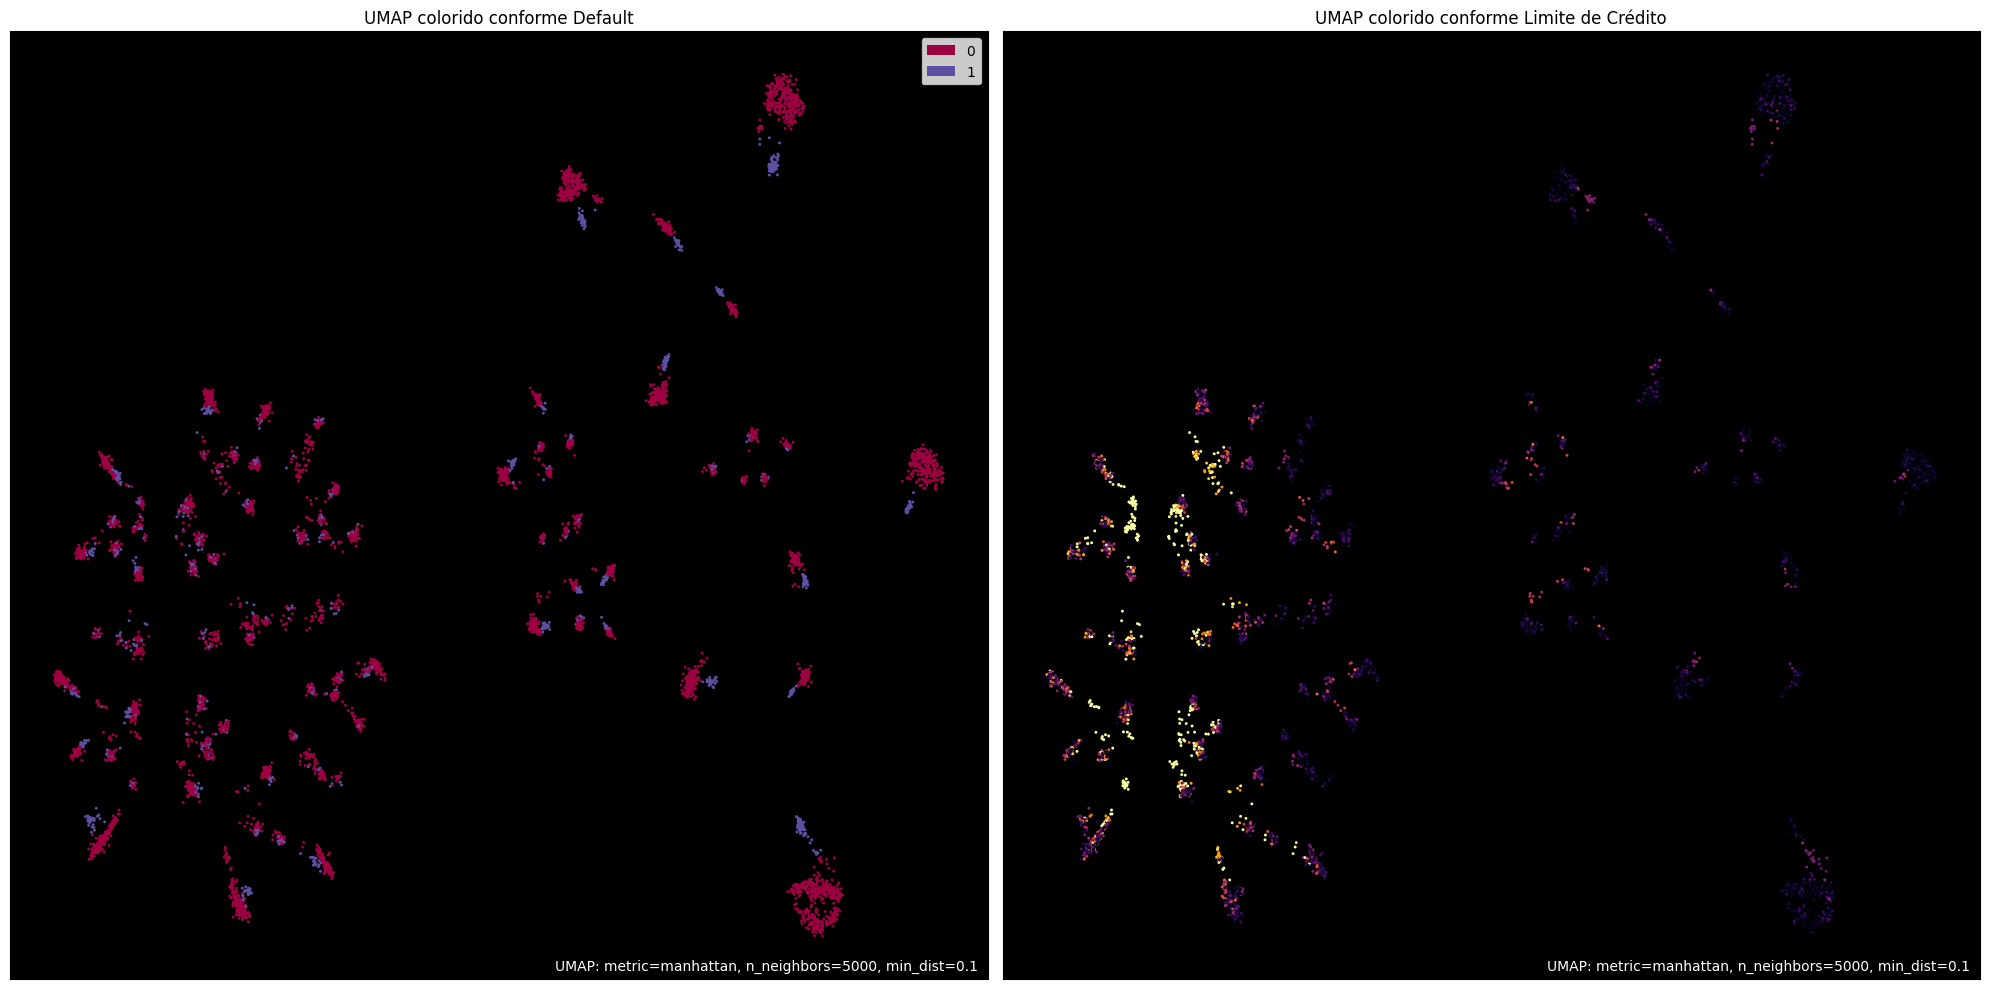

In [4]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

umap2 = UMAP(
    n_components=2,
    n_neighbors=5000,
    random_state=42,
    init="spectral",
    metric="manhattan",
    spread=1,
    min_dist=0.1
) 

pipeline2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('umap', umap2)
    
])

embedded_data = pipeline2.fit_transform(df)


fig, axes = plt.subplots(1,2, figsize=(20,10))

umap.plot.points(pipeline2.named_steps['umap'], 
                 labels=df['default'],
                 ax=axes[0], 
                 #theme='inferno'
                 background='gray'
                 )  

axes[0].set_title('UMAP colorido conforme Default')


umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['limite_credito'], 
                 ax=axes[1], 
                 theme='inferno'
                 )  

axes[1].set_title('UMAP colorido conforme Limite de Crédito')

plt.tight_layout()
plt.show()

Já o limite de crédito não diz muita coisa para este plot mas é possível fazer uma rápida inferência, como por exemplo: o fato de que uma grande parte dos clientes ter um limite de crédito parecido. Percebe-se, ligeiramente, menos inadimplentes nos clusters onde há a presença dos clientes com maiores limites de crédito.

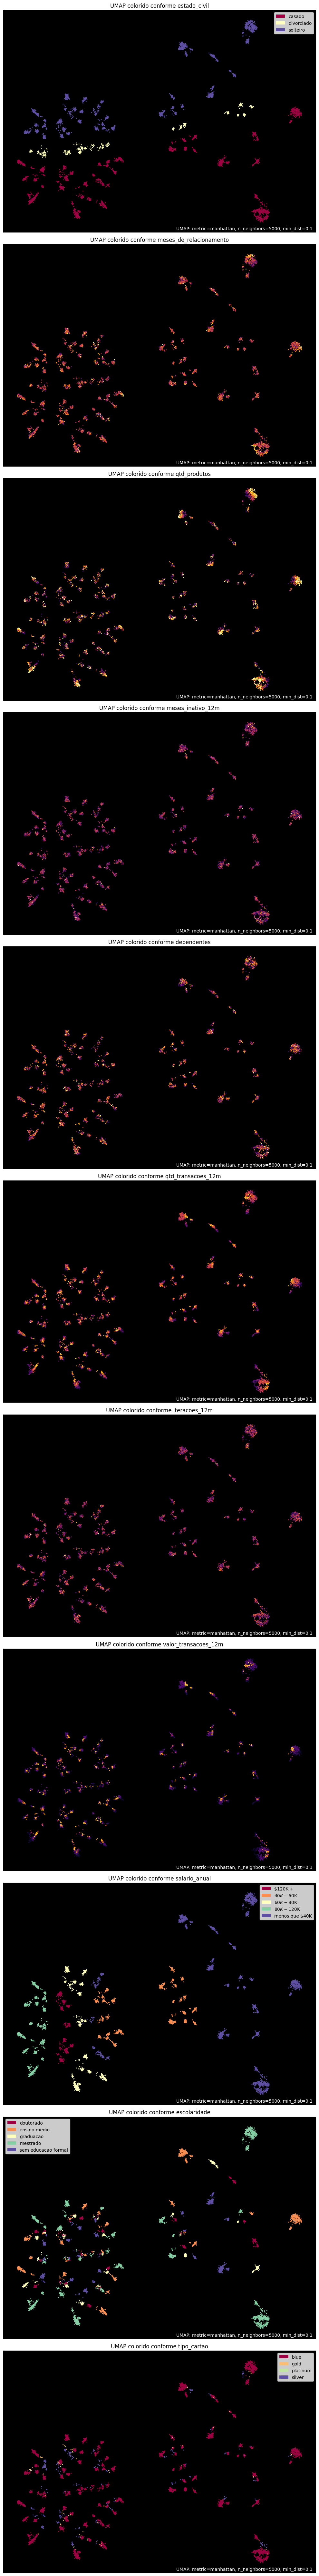

In [15]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

umap2 = UMAP(
    n_components=2,
    n_neighbors=5000,
    random_state=42,
    init="spectral",
    metric="manhattan",
    spread=1,
    min_dist=0.1
) 

pipeline2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('umap', umap2)
    
])

embedded_data = pipeline2.fit_transform(df)


fig, axes = plt.subplots(11,1, figsize=(10,80))

umap.plot.points(pipeline2.named_steps['umap'], 
                 labels=df['estado_civil'],
                 ax=axes[0], 
                 #theme='inferno'
                 background='black'
                 )  

axes[0].set_title('UMAP colorido conforme estado_civil')


umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['meses_de_relacionamento'], 
                 ax=axes[1], 
                 theme='inferno'
                 )  

axes[1].set_title('UMAP colorido conforme meses_de_relacionamento')

umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['qtd_produtos'], 
                 ax=axes[2], 
                 theme='inferno'
                 )  

axes[2].set_title('UMAP colorido conforme qtd_produtos')

umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['meses_inativo_12m'], 
                 ax=axes[3], 
                 theme='inferno'
                 )  

axes[3].set_title('UMAP colorido conforme meses_inativo_12m')

umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['dependentes'], 
                 ax=axes[4], 
                 theme='inferno'
                 )  

axes[4].set_title('UMAP colorido conforme dependentes')

umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['qtd_transacoes_12m'], 
                 ax=axes[5], 
                 theme='inferno'
                 ) 

axes[5].set_title('UMAP colorido conforme qtd_transacoes_12m')

umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['iteracoes_12m'], 
                 ax=axes[6], 
                 theme='inferno'
                 ) 

axes[6].set_title('UMAP colorido conforme iteracoes_12m')

umap.plot.points(pipeline2.named_steps['umap'], 
                 values=df['valor_transacoes_12m'], 
                 ax=axes[7], 
                 theme='inferno'
                 )  

axes[7].set_title('UMAP colorido conforme valor_transacoes_12m')

umap.plot.points(pipeline2.named_steps['umap'], 
                 labels=df['salario_anual'], 
                 ax=axes[8], 
                 theme='inferno'
                 )  

axes[8].set_title('UMAP colorido conforme salario_anual')

umap.plot.points(pipeline2.named_steps['umap'], 
                 labels=df['escolaridade'], 
                 ax=axes[9], 
                 theme='inferno'
                 )  

axes[9].set_title('UMAP colorido conforme escolaridade')

umap.plot.points(pipeline2.named_steps['umap'], 
                 labels=df['tipo_cartao'], 
                 ax=axes[10], 
                 theme='inferno'
                 ) 

axes[10].set_title('UMAP colorido conforme tipo_cartao')

plt.tight_layout()
plt.show()

<center>

## III\. Insights Adquiridos

Vários plots foram feitos acima, nestes percebemos outros insights como os clientes com maiores tempos de relacionemento também tendem a não ser inadimplentes e aqueles cujo o valor das transações é pequeno tendem a ser inadimplentes. Essa quantidade de informações permite ao banco refinar sua avaliação de crédito de um cliente ou um grupo destes garantindo maior precisão ao oferecer crédito. Um exemplo disso é que um cliente que é casado, com mestrado e que seu número de transações começa a diminuir deve ser abordado de uma maneira diferente de um cliente solteiro, com ensino médio que também tem um número de transações que diminui.

<center>

## IV\. Referências

https://umap-learn.readthedocs.io/en/latest/basic_usage.html

https://pair-code.github.io/understanding-umap/

https://pair-code.github.io/understanding-umap/supplement.html

https://search.r-project.org/CRAN/refmans/uwot/html/umap.html
